In [1]:
from typing import cast

from cfrpy.pkr.game import RiverOfBlood, Fold, Call
from cfrpy.pkr.abstraction.versions.v1 import Abstraction
from cfrpy.cfrplus import eswalkplus
from cfrpy.escfr import eswalk
from cfrpy.cfr import walk
from cfrpy.game import Player, mc, play

In [2]:
g = Abstraction()
g = g.apply(g.sample())
g = g.apply(g.sample())

g.infoset(g.active).actions()

(Fold(), Call(), Bet(bet=16), Bet(bet=32), Bet(bet=80), Bet(bet=256))

In [3]:
list(mc(Abstraction()))

[Draw(hand=(Card("2c"), Card("Jc"))),
 Draw(hand=(Card("3d"), Card("3h"))),
 Bet(bet=256),
 Call(),
 Flop(cards=(Card("3c"), Card("6h"), Card("6s"))),
 Check(),
 Check(),
 Turn(cards=(Card("Jd"),)),
 Bet(bet=16),
 Call(),
 River(cards=(Card("2h"),)),
 Bet(bet=16),
 Call(),
 Run(cards=(Card("5c"),)),
 Check(),
 Bet(bet=16),
 Fold()]

In [4]:
regrets = {}
strategies = {}
start = 1

In [32]:
import sys

T = 10000

t = start
try:
    for t in range(start, T):
        for i in range(2):
            eswalkplus(Abstraction(), cast(Player, i), regrets, strategies, t)
            print(f"{t}\t{len(strategies)}", end="\r")
            sys.stdout.flush()
except KeyboardInterrupt:
    pass
finally:
    start = t

In [33]:
# strategies

{(0, 0, 17, False, 16, ((Fold(), Call()), True), (16, 256)): {Fold(): 1806.4321810835131,
  Call(): 15839.361412006157,
  Bet(bet=16): 3895.3519280170326,
  Bet(bet=32): 9262.074848989334,
  Bet(bet=80): 5033.833713321819,
  Bet(bet=256): 76744.94591658215},
 (1, 0, 11, False, 16, ((Check(),), True), (16, 256)): {Check(): 8842.682492924856,
  Bet(bet=16): 7959.123281856535,
  Bet(bet=32): 8045.710940265285,
  Bet(bet=80): 23615.01230264602,
  Bet(bet=256): 33933.470982307306},
 (0, 0, 18, False, 16, ((Fold(), Call()), True), (256, 256)): {Fold(): 1649.5661590015347,
  Call(): 14525.573977154481,
  Bet(bet=256): 15618.859863843982},
 (1, 3, 18, False, 256, ((Check(),), True), (16, 256)): {Check(): 13291.678892817334,
  Bet(bet=16): 15976.884722591876,
  Bet(bet=256): 36410.436384590794},
 (0, 3, 21, False, 256, ((Fold(), Call()), True), (4096, 256)): {Fold(): 1994.2935683061005,
  Call(): 12835.7064316939},
 (1, 4, 26, False, 4096, ((Check(),), True), (16, 16)): {Check(): 96412.88239771

In [8]:
import numpy as np


def normalize(dct):
    denom = sum(dct.values())
    if denom <= 0:
        return {k: 1 / len(dct) for k in dct}
    return {k: v / denom for k, v in dct.items()}


def play(game, strategies, player):
    unknowns = 0
    while not game.terminal:
        if game.chance:
            action = game.sample()
        else:
            infoset = game.infoset(game.active)
            actions = infoset.actions()

            if infoset in strategies and game.active == player:
                action = max(actions, key=lambda a: strategies[infoset].get(a, 0))
            else:
                if game.active == player:
                    unknowns += 1

                actions = infoset.actions()
                action = np.random.choice(actions)
                while isinstance(action, Fold):
                    action = np.random.choice(actions)

        game = game.apply(action)
    
    return game.payoff(player), unknowns

In [26]:
play(Abstraction(), strategies, 0)

(-307, 0)

In [27]:
import matplotlib.pyplot as plt

In [28]:
N = 1000

payoffs = []
unks = 0
for k in range(N):
    pay, unk = play(Abstraction(), strategies, 0)
    payoffs.append(pay)
    unks += unk

unks

6

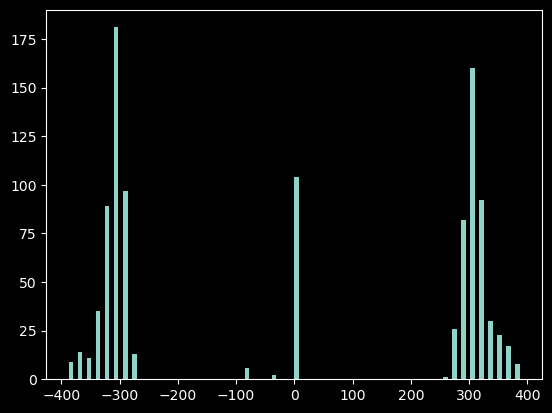

In [29]:
plt.hist(payoffs, bins=100);

In [31]:
np.mean(payoffs)

-3.662